In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
customer = pd.read_csv('customer_shopping_data.csv')
customer.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


### Limpieza y construyendo datos


#### Revisar si un valor es nulo 

In [4]:
customer.isnull().sum()


invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

### Cambiar tipo de dato a fecha para extraer dia mes y año 

In [5]:
customer['invoice_date'] = customer['invoice_date'].apply(pd.to_datetime,dayfirst=True)
customer['day'] = customer['invoice_date'].dt.day
customer['month'] = customer['invoice_date'].dt.month
customer['year']= customer['invoice_date'].dt.year
customer.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,day,month,year
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,5,8,2022
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,12,12,2021
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,9,11,2021
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,16,5,2021
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,24,10,2021


### quitar columna 'customer_id' Crear una columna de profit 

In [6]:
customer.drop(columns='customer_id',inplace=True)
customer['sales'] = customer['quantity'] * customer['price']


### agrupar por edades 

In [7]:
customer['age'].min()
customer['age'].max()
customer.loc[customer['age'].between(18, 26, 'both'), 'seeding'] = 'youth'
customer.loc[customer['age'].between(27, 59, 'both'), 'seeding'] = 'adulthood'
customer.loc[customer['age'].between(60, 100, 'both'), 'seeding'] = 'old age'
customer.head()

,invoice_no,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,day,month,year,sales,seeding
0,I138884,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,5,8,2022,7502.00,adulthood
1,I317333,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,12,12,2021,5401.53,youth
2,I127801,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,9,11,2021,300.08,youth
3,I173702,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,16,5,2021,15004.25,old age
4,I337046,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,24,10,2021,242.40,adulthood


#### Extracion de datos 

#### Cual es la proporcion de generos en el set de datos

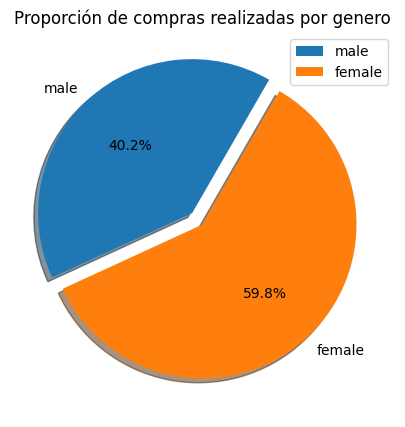

array(['Female', 'Male'], dtype=object)

In [8]:
male = customer[customer['gender']=='Male'].count()['gender']
female = customer[customer['gender']!='Male'].count()['gender']

labels = 'male','female'
sizes = [male,female]
plt.figure(figsize=(8,5))
plt.title('Proporción de compras realizadas por genero')
plt.pie(sizes, labels=labels,autopct='%1.1f%%',shadow=True,explode=(0.1,0),startangle=60,radius=1)
plt.legend()
plt.show()
f'el porcentaje de hombres que compra es de {round(100*male/customer["gender"].count())}% el porcentaje de mujeres que compra es de {round(100*female/customer["gender"].count())}%'
customer['gender'].unique()

#### Que grupo de edades tiene mas compradores

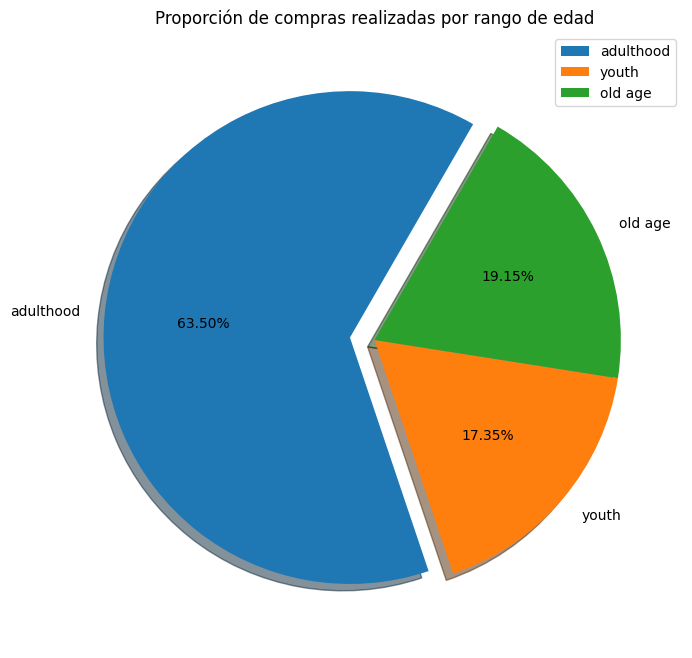

0.1734920618960958 0.6350382577395256 0.19146968036437859


In [9]:
youth = customer[customer['seeding']=='youth'].count()['seeding']
adulthood = customer[customer['seeding']=='adulthood'].count()['seeding']
old_age = customer[customer['seeding']=='old age'].count()['seeding']

labels = customer['seeding'].unique()
sizes = []
for i in labels:
    sizes.append(customer[customer['seeding']==i].count()['seeding'])
plt.figure(figsize=(8,8))
plt.title('Proporción de compras realizadas por rango de edad')
plt.pie(sizes, labels=labels,autopct='%1.2f%%',explode=(0.1,0,0),shadow=True,startangle=60,radius=1)
plt.legend()
plt.show()
print(youth/customer['seeding'].shape[0],adulthood/customer['seeding'].shape[0],old_age/customer['seeding'].shape[0])

#### Which category of products is sold the most and the least ?

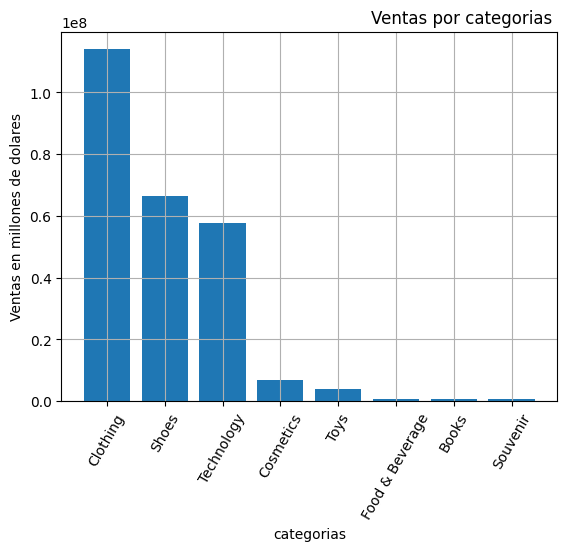

In [10]:
category = customer.groupby('category').sum(numeric_only=True).reset_index().sort_values(by='sales',ascending=False)
plt.title('Ventas por categorias ',loc='right')
plt.xlabel('categorias')
plt.xticks(rotation= 60)
plt.ylabel('Ventas en millones de dolares')
plt.grid()
plt.bar(category['category'],category['sales'])
plt.show()

#### Cual es el metodo de pago mas utilizado 

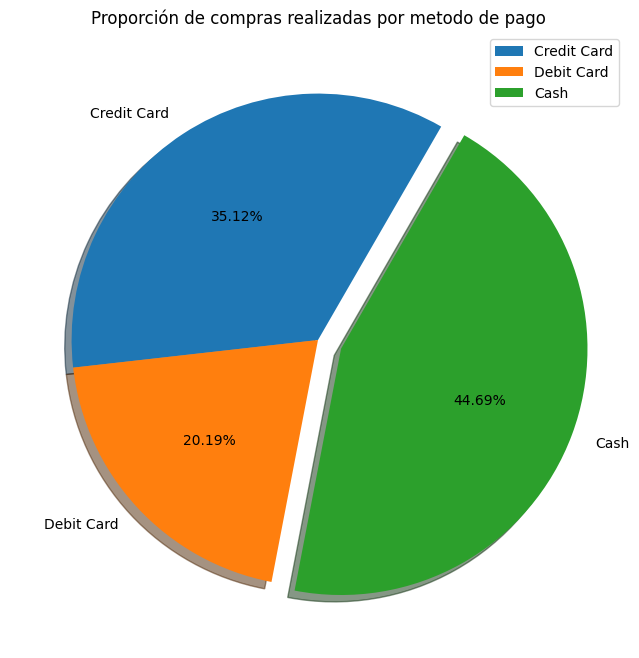

In [11]:

labels = customer['payment_method'].unique()
sizes =[]
for i in labels:
    sizes.append(customer[customer['payment_method']==i].count()['payment_method'])
plt.figure(figsize=(8,8))
plt.title('Proporción de compras realizadas por metodo de pago')
plt.pie(sizes, labels=labels,autopct='%1.2f%%',explode=(0,0,0.1),shadow=True,startangle=60,radius=1)
plt.legend()
plt.show()

#### Que tienda es mas visitada 

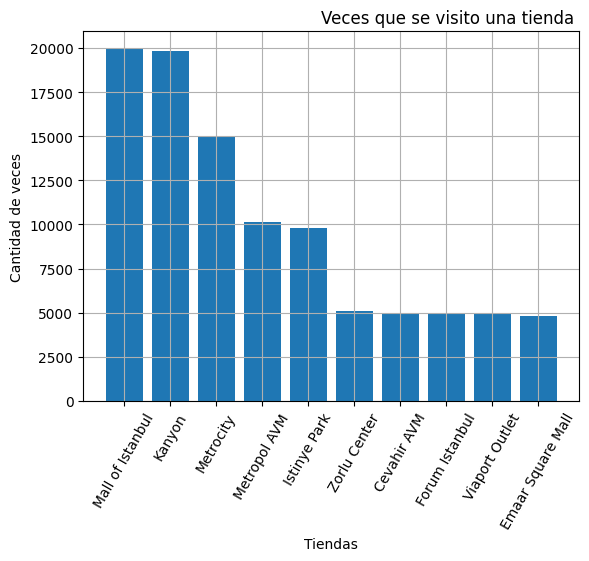

In [16]:
store = customer.groupby('shopping_mall').count().reset_index().sort_values(by='invoice_no',ascending=False)
plt.title('Veces que se visito una tienda ',loc='right')
plt.xlabel('Tiendas')
plt.xticks(rotation= 60)
plt.ylabel('Cantidad de veces')
plt.grid()
plt.bar(store['shopping_mall'],store['invoice_no'])
plt.show()